import packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as mtpl
import seaborn as sns

read data

In [2]:
data = pd.read_csv("/content/StudentsPerformance.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

## Checking the null values

In [5]:
null_values = data.isnull().sum()
print(null_values)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Checking all the columns present in the given data

In [6]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Finding average score

In [7]:
data['average score'] = (data['math score'] + data['writing score'] + data['reading score'])/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Average score is decimal data so rounding it with 2

---



In [8]:
data['average score'] = np.round(data['average score'], 2)

In [9]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


1.

In [10]:
#Save the data into Clean data folder
data.to_csv("/content/CleanData_Student_Performance2.csv")

**Pie Plot**


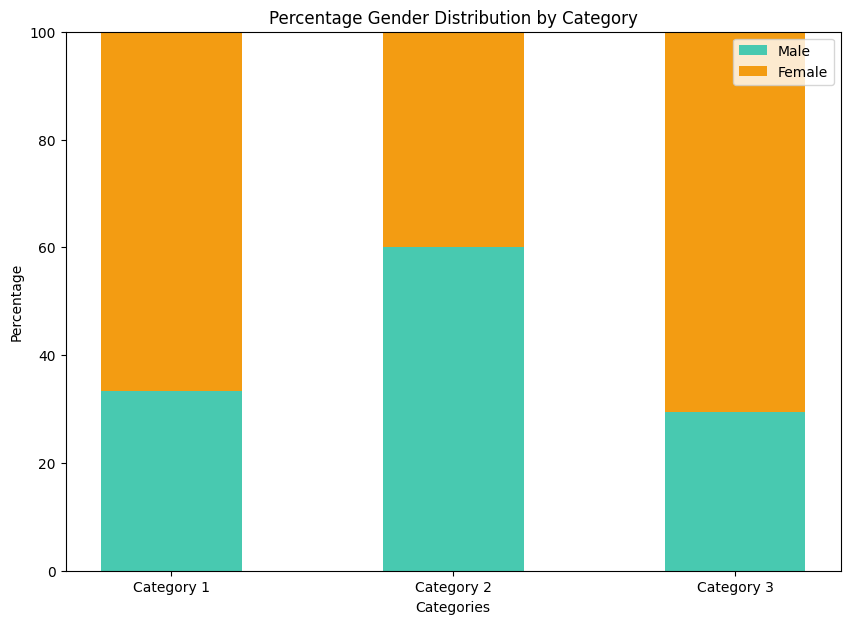

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories = ['Category 1', 'Category 2', 'Category 3']
gender1_counts = np.array([10, 15, 5])  # Example counts for Gender 1
gender2_counts = np.array([20, 10, 12])  # Example counts for Gender 2

# Calculate the percentage for each gender within each category
total_counts = gender1_counts + gender2_counts
gender1_percents = (gender1_counts / total_counts) * 100
gender2_percents = (gender2_counts / total_counts) * 100

ind = np.arange(len(categories))  # the x locations for the groups
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(ind, gender1_percents, width, label='Male', color="#48C9B0")
rects2 = ax.bar(ind, gender2_percents, width, bottom=gender1_percents, label='Female', color="#F39C12")

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('Percentage Gender Distribution by Category')
ax.set_xticks(ind)
ax.set_xticklabels(categories)
ax.set_ylim(0, 100)  # Ensure the y-axis goes from 0% to 100%
ax.legend()

plt.savefig('/content/Snapshots/percentage_gender_distribution_stacked_bar.jpg')
plt.show()

<ipython-input-14-e02b378f016c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violinplot = sns.violinplot(x='gender', y='reading score', data=data, palette={"male": "lightblue", "female": "lightpink"}, inner=None)  # Remove the inner annotations for clarity


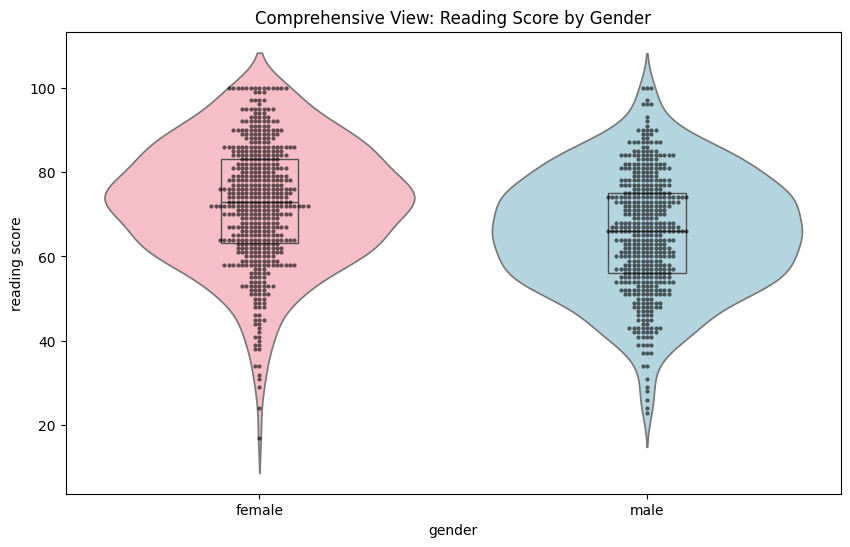

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Create the violin plot to show the distribution density and shape
violinplot = sns.violinplot(x='gender', y='reading score', data=data, palette={"male": "lightblue", "female": "lightpink"}, inner=None)  # Remove the inner annotations for clarity

# Overlay the box plot inside the violin plot for summary statistics. Set width smaller and adjust transparency
boxplot = sns.boxplot(x='gender', y='reading score', data=data, width=0.2, showcaps=False, boxprops={'facecolor':'None'}, whiskerprops={'linewidth':0}, saturation=1, fliersize=0)

# Then, add a swarm plot for individual data points, using a darker color for contrast and better visibility
swarmplot = sns.swarmplot(x='gender', y='reading score', data=data, color='black', alpha=0.6, size=3)

plt.title('Comprehensive View: Reading Score by Gender')

# To save the figure
plt.savefig('/content/Snapshots/Reading_score_by_gender_comprehensive_view.jpg')
plt.show()

**Race Plot**

In [15]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [16]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

<ipython-input-18-e7006fee9036>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxenplot = sns.boxenplot(data=data, x='race/ethnicity', y='average score', palette='coolwarm')


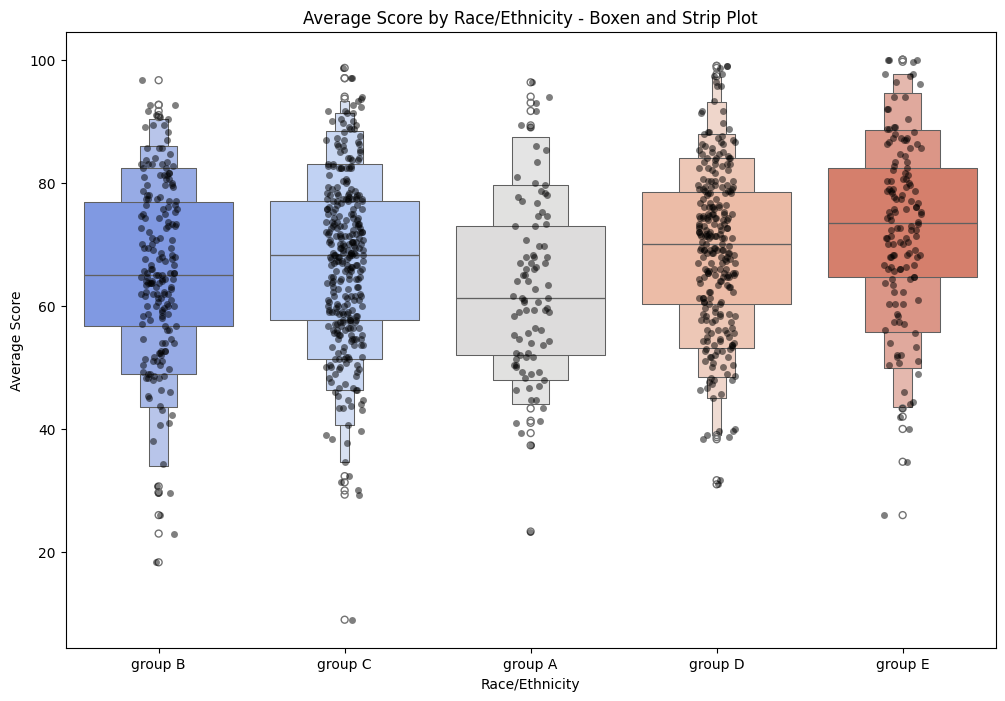

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

# Create a boxen plot for a detailed look at the distribution
boxenplot = sns.boxenplot(data=data, x='race/ethnicity', y='average score', palette='coolwarm')

# Overlay a strip plot on the same axes for individual data points, with jitter for better readability
stripplot = sns.stripplot(data=data, x='race/ethnicity', y='average score', color='black', alpha=0.5, jitter=True)

plt.title('Average Score by Race/Ethnicity - Boxen and Strip Plot')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
# Ensure the race/ethnicity categories are correctly labeled
race_ethnicity_categories = data['race/ethnicity'].unique()
plt.xticks(ticks=np.arange(len(race_ethnicity_categories)), labels=race_ethnicity_categories)

# Save the figure
plt.savefig('/content/Snapshots/race_average_score_boxen_strip.jpg')
plt.show()

**Create a scatter plot comparing Average Score with Math, Writing, and Reading Scores**

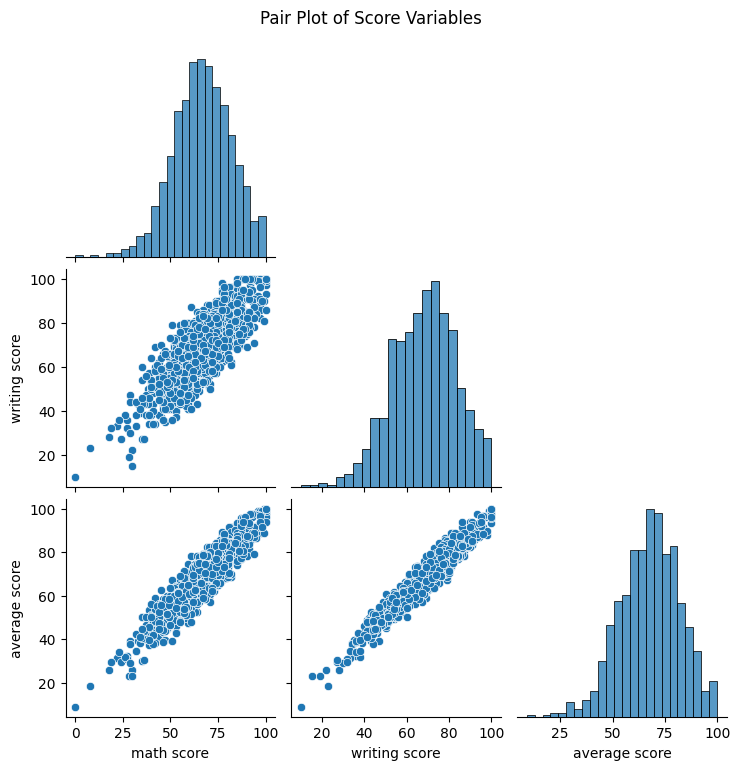

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame has columns 'math score', 'writing score', 'average score'
# Create a pair plot
sns.pairplot(data[['math score', 'writing score', 'average score']], corner=True)

plt.suptitle('Pair Plot of Score Variables', y=1.02)  # Adjust title position

# Save the figure. Note: Saving via plt.savefig might not capture the full pairplot as intended due to layout complexities.
# It's recommended to save the figure through the interactive plot window if necessary.
plt.savefig('/content/Snapshots/scores_pairplot.jpg')
plt.show()

<ipython-input-30-093e84a4e445>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxenplot = sns.boxenplot(x='gender', y='average score', data=data, palette=['#3498db', '#9b59b6'])


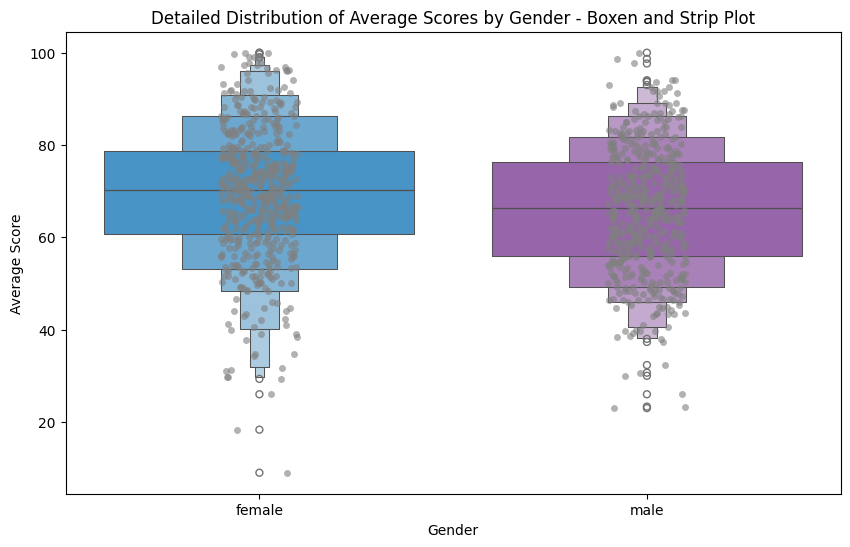

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Create a boxen plot for a detailed look at the distribution
boxenplot = sns.boxenplot(x='gender', y='average score', data=data, palette=['#3498db', '#9b59b6'])

# Overlay with a strip plot to show individual data points, enhancing the distribution view
stripplot = sns.stripplot(x='gender', y='average score', data=data, color="grey", alpha=0.6, jitter=True)

plt.title('Detailed Distribution of Average Scores by Gender - Boxen and Strip Plot')
plt.xlabel('Gender')
plt.ylabel('Average Score')

# Adjust the file save path to work in this environment
plt.savefig('/content/Snapshots/detailed_ave_score_by_gender_boxen_strip.jpg')
plt.show()